In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

In [88]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
# Опишем функцию для проверки распределения данных

%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest
import matplotlib.pyplot as plt

def analyze(data):
  plt.style.use('ggplot')
  np.var(data)
  plt.hist(data, bins=60)
  print("mean : ", np.mean(data))
  print("var  : ", np.var(data))
  print("skew : ", skew(data))
  print("kurt : ", kurtosis(data))
  print("shapiro : ", shapiro(data))
  print("normaltest : ", normaltest(data))

In [0]:
# Опишем функцию для нормализации данных
# Используем тест Шапиро и выбираем наилучший результат

from sklearn.preprocessing import PowerTransformer

def normalize(data, train):
  tests = [[data, shapiro(data)]]

  box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
  yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values

  box_cox = data
  if (data.values.min() > 0):
    box_cox = box_cox_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  yeo_johnson = yeo_johnson_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  log = np.log(data.values.reshape(train.shape[0],-1))

  tests.append([box_cox,shapiro(box_cox)])
  tests.append([yeo_johnson,shapiro(yeo_johnson)])
  tests.append([log,shapiro(log)])

  res = tests[0]
  for i in range(1,len(tests)-1):
    if tests[i][1][1] > res[1][1]:
      res = tests[i]

  return res[0]

In [0]:
# Опишем функцию для выборки данных, далеких от нормальных

def get_not_normalized(data, threshold):
  res = []
  for col in data.columns:
    if shapiro(data[col])[1] < threshold:
      res.append(col)

  return res

In [0]:
# Стандартизируем данные

columns = df.columns.drop('quality')
df_temp = df[columns]

from sklearn.preprocessing import StandardScaler # MinMaxScaler RobustScaler
scaler = StandardScaler()
scaler.fit(df_temp)

df_temp_prep = scaler.transform(df_temp)
df[columns] = df_temp_prep

In [94]:
# Выбираем данные, далекие от нормальных

not_norm_columns = get_not_normalized(df[columns], 0.8)
not_norm_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [95]:
# Пробуем нормализовать данные, далекие от нормальных

for col in not_norm_columns:
  df[col] = normalize(df[col], df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14:

In [96]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.603063,0.858513,-1.576462,-0.649019,-0.287875,-0.549379,-0.445663,0.554123,1.243702,-0.715408,-1.237701,5
1,-0.323045,1.622133,-1.576462,0.041853,0.193346,0.670896,0.493097,0.028248,-0.736291,0.122510,-0.690870,5
2,-0.323045,1.124142,-1.324529,-0.195162,0.090161,-0.086413,0.207672,0.133993,-0.334966,-0.049052,-0.690870,5
3,1.212192,-1.618096,1.307151,-0.649019,-0.317315,0.103301,0.348669,0.658551,-1.007812,-0.547974,-0.690870,6
4,-0.603063,0.858513,-1.576462,-0.649019,-0.287875,-0.549379,-0.445663,0.554123,1.243702,-0.715408,-1.237701,5


In [97]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
# Применяем oversampling, чтобы сбалансировать данные по полю quality

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = df[columns].values
y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [102]:
X = pd.concat([df[columns], df['quality']], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.603063,0.858513,-1.576462,-0.649019,-0.287875,-0.549379,-0.445663,0.554123,1.243702,-0.715408,-1.237701,5
1,-0.323045,1.622133,-1.576462,0.041853,0.193346,0.670896,0.493097,0.028248,-0.736291,0.122510,-0.690870,5
2,-0.323045,1.124142,-1.324529,-0.195162,0.090161,-0.086413,0.207672,0.133993,-0.334966,-0.049052,-0.690870,5
3,1.212192,-1.618096,1.307151,-0.649019,-0.317315,0.103301,0.348669,0.658551,-1.007812,-0.547974,-0.690870,6
4,-0.603063,0.858513,-1.576462,-0.649019,-0.287875,-0.549379,-0.445663,0.554123,1.243702,-0.715408,-1.237701,5


In [103]:
q5 = X[X.quality==5]
q6 = X[X.quality==6]
q7 = X[X.quality==7]
q4 = X[X.quality==4]
q8 = X[X.quality==8]
q3 = X[X.quality==3]

q6_upsampled = resample(q6,
                          replace=True,
                          n_samples=len(q5), 
                          random_state=27)
q7_upsampled = resample(q7,
                          replace=True,
                          n_samples=len(q5), 
                          random_state=27)
q4_upsampled = resample(q4,
                          replace=True,
                          n_samples=len(q5), 
                          random_state=27)
q8_upsampled = resample(q8,
                          replace=True,
                          n_samples=len(q5), 
                          random_state=27)
q3_upsampled = resample(q3,
                          replace=True,
                          n_samples=len(q5), 
                          random_state=27)

upsampled = pd.concat([q5, q6_upsampled, q7_upsampled, q4_upsampled, q8_upsampled, q3_upsampled])

upsampled.quality.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [0]:
y_train = upsampled.quality.values.astype(np.float64)
X_train = upsampled.drop('quality', axis=1).values

In [0]:
from sklearn.model_selection import GridSearchCV

# Функция для поиска лучших параметров модели
def gridSearchResults(classifier, grid_params, x, y):
  gs = GridSearchCV(
      classifier,
      grid_params,
      verbose = 1,
      cv = 3,
      n_jobs = -1
  )

  gsResults = gs.fit(x, y)
  print("Best Score: {}".format(gsResults.best_score_))
  print("Best Estimator: {}".format(gsResults.best_estimator_))
  print("Best Params: {}".format(gsResults.best_params_))

  return gsResults.best_params_

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
import matplotlib.pyplot as plt

# функция для анализа модели
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def test_model(model, X_train, Y_train, Y_test):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  value_of_metrics(Y_test, Y_pred)

Применяем различные варианты бустинга

GradientBoosting

In [116]:
# Находим оптимальные параметры модели

from sklearn.ensemble import GradientBoostingRegressor

grid_params = {
  'n_estimators': [1,2,5,10,20,30,40,50],
  'max_depth': [1,2,5,10]
}
gridSearchResults(GradientBoostingRegressor(), grid_params, X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.10343737103623336
Best Estimator: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Best Params: {'max_depth': 5, 'n_estimators': 2}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.1s finished


{'max_depth': 5, 'n_estimators': 2}

In [124]:
gradient_boosting_regressor = GradientBoostingRegressor(max_depth = 5, n_estimators = 2)
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_1 = gradient_boosting_regressor.predict(X_test)

In [0]:
# Функция для сравнения актуальных и предсказанных значений

from sklearn import metrics

def check_predictions(y_test, y_pred):
  df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  df1 = df.head(25)

  df1.plot(kind='bar',figsize=(10,8))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

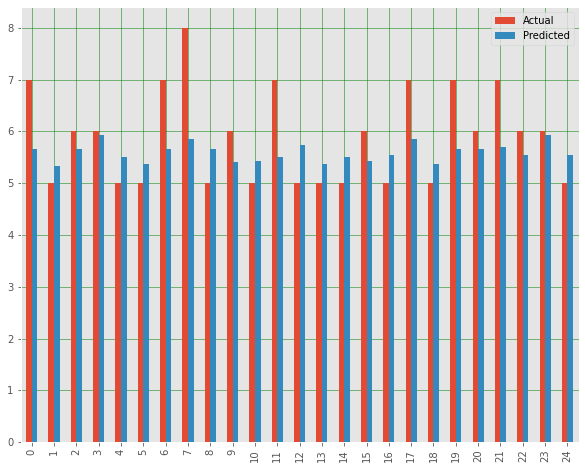

Mean Absolute Error: 0.6058255611097023
Mean Squared Error: 0.5259444044283444
Root Mean Squared Error: 0.7252202454622626


In [146]:
check_predictions(y_test, y_pred_1)

XGBRegressor

In [0]:
from xgboost.sklearn import XGBRegressor

In [149]:
grid_params = {
  'n_estimators': [1,2,5,10,20,30,40,50],
  'max_depth': [1,2,5,10],
  'gamma': [i/10.0 for i in range(0,5)],
  'min_child_weight': [1,2,3,6,8,10,12],
  'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}
gridSearchResults(XGBRegressor(), grid_params, X_train, y_train)

Fitting 3 folds for each of 5600 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1416 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 2846 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4422 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6620 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9806 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 12872 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 16450 tasks      | elapsed: 11.3min


[10:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: -0.9198676125401365
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
Best Params: {'gamma': 0.0, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 40, 'reg_lambda': 100}


[Parallel(n_jobs=-1)]: Done 16800 out of 16800 | elapsed: 11.8min finished


{'gamma': 0.0,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 40,
 'reg_lambda': 100}

In [150]:
xgb_regressor = XGBRegressor(gamma = 0.0, max_depth = 1, min_child_weight = 1, n_estimators = 40, reg_lambda = 100)
xgb_regressor.fit(X_train, y_train)

[10:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_2 = xgb_regressor.predict(X_test)

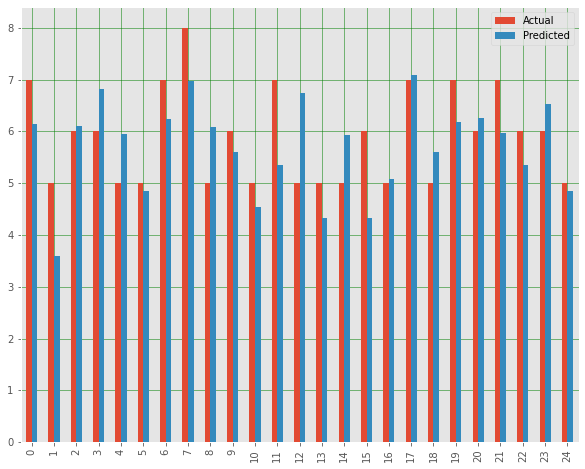

Mean Absolute Error: 0.6244047945737838
Mean Squared Error: 0.5918418314564239
Root Mean Squared Error: 0.7693125707125965


In [152]:
check_predictions(y_test, y_pred_2)